In [15]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
import glob

# Get a list of all CSV files in the directory
csv_files = glob.glob('../data/*.csv')

combined_df = pd.read_csv(csv_files[0])

for csv_file in csv_files[1:]:
    df = pd.read_csv(csv_file)
    
    # Drop duplicate columns in the new DataFrame
    duplicate_columns = set(combined_df.columns) & set(df.columns)
    duplicate_columns = duplicate_columns - {'player'}  # Keep the player_name column for merging
    df = df.drop(columns=list(duplicate_columns))
    
    combined_df = combined_df.merge(df, on='player', how='outer')



In [52]:
combined_df

,player,position,team,age,birth_year,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,...,on_goals_for,on_goals_against,plus_minus,plus_minus_per90,plus_minus_wowy,on_xg_for,on_xg_against,xg_plus_minus,xg_plus_minus_per90,xg_plus_minus_wowy
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,9.0,6,4.0,4.0,...,4.0,6.0,-2.0,-0.50,0.00,2.3,7.2,-4.9,-1.23,0.00
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,2.0,0,0.0,2.0,...,1.0,4.0,-3.0,-1.02,43.98,2.6,4.1,-1.5,-0.49,9.06
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,3.0,1,1.0,2.0,...,5.0,3.0,2.0,0.99,1.18,3.1,1.6,1.5,0.90,1.30
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,7.0,3,5.0,2.0,...,1.0,7.0,-6.0,-2.00,0.00,1.4,3.5,-2.1,-0.71,0.00
4,Abdessamad Ezzalzouli,FW,Morocco,21-001,2001,1.0,3.0,2,2.0,1.0,...,0.0,1.0,-1.0,-0.97,-1.29,1.1,1.4,-0.3,-0.48,-0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Ángel Di María,MF,Argentina,34-307,1988,3.2,3.0,1,2.0,0.0,...,5.0,2.0,3.0,0.94,0.04,6.8,0.8,6.0,1.92,0.91
481,Ángelo Preciado,DF,Ecuador,24-303,1998,2.9,7.0,5,3.0,3.0,...,4.0,3.0,1.0,0.34,0.34,3.6,2.5,1.1,0.37,-0.79
482,Éder Militão,DF,Brazil,24-334,1998,3.9,7.0,6,4.0,1.0,...,6.0,1.0,5.0,1.30,1.30,9.1,1.5,7.5,1.95,0.34
483,Óscar Duarte,DF,Costa Rica,33-198,1989,3.0,4.0,2,4.0,0.0,...,3.0,11.0,-8.0,-2.67,0.00,1.4,10.1,-8.7,-2.90,0.00


In [54]:
combined_df['position'].value_counts()

DF    183
MF    144
FW    119
GK     39
Name: position, dtype: int64

In [55]:
list(combined_df.columns)

['player',
 'position',
 'team',
 'age',
 'birth_year',
 'minutes_90s',
 'tackles',
 'tackles_won',
 'tackles_def_3rd',
 'tackles_mid_3rd',
 'tackles_att_3rd',
 'dribble_tackles',
 'dribbles_vs',
 'dribble_tackles_pct',
 'dribbled_past',
 'blocks',
 'blocked_shots',
 'blocked_passes',
 'interceptions',
 'tackles_interceptions',
 'clearances',
 'errors',
 'club',
 'games',
 'games_starts',
 'minutes',
 'goals',
 'assists',
 'goals_pens',
 'pens_made',
 'pens_att',
 'cards_yellow',
 'cards_red',
 'goals_per90',
 'assists_per90',
 'goals_assists_per90',
 'goals_pens_per90',
 'goals_assists_pens_per90',
 'xg',
 'npxg',
 'xg_assist',
 'npxg_xg_assist',
 'xg_per90',
 'xg_assist_per90',
 'xg_xg_assist_per90',
 'npxg_per90',
 'npxg_xg_assist_per90',
 'passes_completed',
 'passes',
 'passes_pct',
 'passes_total_distance',
 'passes_progressive_distance',
 'passes_completed_short',
 'passes_short',
 'passes_pct_short',
 'passes_completed_medium',
 'passes_medium',
 'passes_pct_medium',
 'passes_c

In [56]:
useful_cols_MF = ['player', 'position', 'club', 'team', 'age', 'games_starts', 'minutes_90s', 'goals_assists_per90',
               'xg_xg_assist_per90', 'tackles_won', 'interceptions', 'passes_pct', 'gca_passes_live', 'gca_passes_dead']

midfielders_df = combined_df.loc[combined_df['position'].isin(['MF']), useful_cols_MF]

In [57]:
midfielders_df.loc[midfielders_df['team'] == 'Netherlands']

,player,position,club,team,age,games_starts,minutes_90s,goals_assists_per90,xg_xg_assist_per90,tackles_won,interceptions,passes_pct,gca_passes_live,gca_passes_dead
110,Davy Klaassen,MF,Ajax,Netherlands,29-300,3,2.1,1.42,0.25,2,1,76.6,2.0,0.0
149,Frenkie de Jong,MF,Barcelona,Netherlands,25-220,5,5.3,0.38,0.22,5,6,88.7,2.0,0.0
297,Marten de Roon,MF,Atalanta,Netherlands,31-264,3,2.0,0.00,0.00,5,2,81.5,0.0,0.0
426,Steven Berghuis,MF,Ajax,Netherlands,30-364,1,2.2,0.45,0.17,1,0,74.0,1.0,0.0
436,Teun Koopmeiners,MF,Atalanta,Netherlands,24-293,1,2.4,0.41,0.13,5,4,75.6,1.0,1.0


In [10]:
midfielders_df.describe()

,games_starts,minutes_90s,goals_assists_per90,xg_xg_assist_per90,tackles_won,interceptions,passes_pct,gca_passes_live,gca_passes_dead
count,288.000000,1296.000000,144.000000,144.000000,288.000000,288.000000,144.000000,144.000000,144.000000
mean,2.784722,2.765278,0.161944,0.210764,2.930556,2.548611,80.115278,0.451389,0.034722
std,1.507996,1.414628,0.284748,0.249388,2.898162,2.407392,8.590988,0.826399,0.183714
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.900000,0.000000,0.000000
25%,2.000000,1.800000,0.000000,0.050000,1.000000,1.000000,75.000000,0.000000,0.000000
50%,3.000000,2.600000,0.000000,0.130000,2.000000,2.000000,81.200000,0.000000,0.000000
75%,4.000000,3.125000,0.330000,0.242500,4.000000,3.000000,86.900000,1.000000,0.000000
max,7.000000,7.300000,1.670000,1.450000,17.000000,14.000000,95.500000,5.000000,1.000000


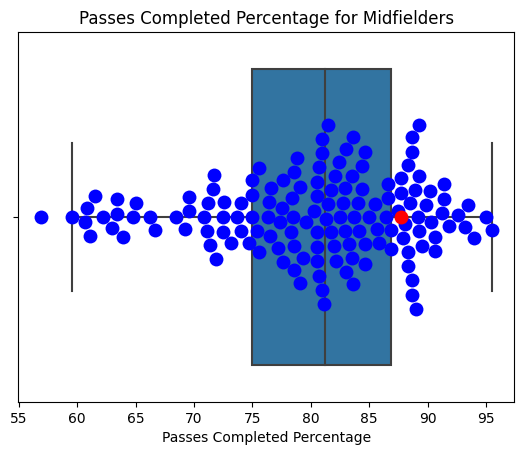

In [22]:
# Set the player name to highlight
player_name = 'Bernardo Silva' # Replace with the name of the player you want to highlight

# Create a box plot of passes completed percentage for midfielders
ax = sns.boxplot(x='passes_pct', data=midfielders_df)

# Add a swarm plot for the player of interest
player_df = midfielders_df[midfielders_df['player'] == player_name]
ax2 = sns.swarmplot(x='passes_pct', data=midfielders_df, color='blue', size=10)
ax = sns.swarmplot(x='passes_pct', data=player_df, color='red', size=10)


# Set the title and axis labels
ax.set_title('Passes Completed Percentage for Midfielders')
ax.set_xlabel('Passes Completed Percentage')

# Show the plot
plt.show()


In [60]:
useful_col_DF = ['player', 'position', 'club', 'team', 'age', 'minutes_90s', 'tackles_won', 'interceptions', 'clearances', 'aerials_won_pct', 'blocks', 'cards_yellow', 'cards_red', 'fouls', 'own_goals', 'ball_recoveries']

defenders_df = combined_df.loc[combined_df['position'].isin(['DF']), useful_col_DF]

In [61]:
defenders_df

,player,position,club,team,age,minutes_90s,tackles_won,interceptions,clearances,aerials_won_pct,blocks,cards_yellow,cards_red,fouls,own_goals,ball_recoveries
3,Abdelkarim Hassan,DF,Al Sadd SC,Qatar,29-112,3.0,3,1,5.0,75.0,3.0,0,0,1,0,11.0
5,Abdou Diallo,DF,RB Leipzig,Senegal,26-228,3.7,2,1,10.0,53.8,1.0,0,0,3,0,17.0
7,Abdulelah Al-Amri,DF,Al-Nassr,Saudi Arabia,25-337,2.0,0,4,10.0,71.4,2.0,2,0,3,0,15.0
9,Achraf Dari,DF,Brest,Morocco,23-226,2.1,0,5,9.0,50.0,7.0,1,0,2,0,10.0
10,Achraf Hakimi,DF,Paris S-G,Morocco,24-044,7.0,17,9,12.0,38.5,7.0,0,0,6,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,Yassine Meriah,DF,Espérance de Tunis,Tunisia,29-169,3.0,2,1,20.0,45.5,5.0,0,0,3,0,16.0
476,Youssouf Sabaly,DF,Betis,Senegal,29-288,4.0,6,4,9.0,57.1,1.0,0,0,3,0,27.0
481,Ángelo Preciado,DF,Genk,Ecuador,24-303,2.9,5,6,4.0,60.0,2.0,0,0,8,0,10.0
482,Éder Militão,DF,Real Madrid,Brazil,24-334,3.9,6,3,5.0,44.4,1.0,1,0,7,0,29.0


In [63]:
useful_col_FW = ['player', 'position', 'club', 'team', 'age', 'goals', 'assists', 'shots_per90', 'shots_on_target_pct', 'xg', 'npxg', 'xg_per90', 'xg_assist', 'xg_assist_per90', 'dribbles_completed_pct']

forwarders_df = combined_df.loc[combined_df['position'].isin(['FW']), useful_col_FW]

In [64]:
forwarders_df

,player,position,club,team,age,goals,assists,shots_per90,shots_on_target_pct,xg,npxg,xg_per90,xg_assist,xg_assist_per90,dribbles_completed_pct
4,Abdessamad Ezzalzouli,FW,Osasuna,Morocco,21-001,0,0,0.97,0.0,0.1,0.1,0.09,0.3,0.39,50.0
14,Akram Afif,FW,Al Sadd SC,Qatar,26-030,0,0,0.67,0.0,0.0,0.0,0.02,0.3,0.10,42.9
16,Aleksandar Mitrović,FW,Fulham,Serbia,28-093,2,0,3.44,30.0,1.6,1.6,0.57,0.7,0.24,100.0
20,Alexis Vega,FW,Guadalajara,Mexico,25-023,0,0,4.20,22.2,0.8,0.8,0.39,0.1,0.06,25.0
30,Almoez Ali,FW,Al Duhail SC,Qatar,26-121,0,0,1.21,33.3,0.4,0.4,0.15,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,Vinicius Júnior,FW,Real Madrid,Brazil,22-159,1,2,2.71,44.4,1.0,1.0,0.30,0.7,0.20,33.3
464,Xherdan Shaqiri,FW,Chicago Fire,Switzerland,31-069,1,1,1.57,50.0,0.3,0.3,0.12,0.9,0.35,0.0
467,Yannick Carrasco,FW,Atlético Madrid,Belgium,29-105,0,0,3.10,0.0,0.3,0.3,0.22,0.0,0.00,33.3
473,Youssef En-Nesyri,FW,Sevilla,Morocco,25-200,2,0,1.49,33.3,1.2,1.2,0.21,0.0,0.01,62.5


In [66]:
useful_col_GK = ['gk_clean_sheets', 'gk_goals_against', 'gk_goals_against_per90', 'gk_shots_on_target_against', 'gk_saves', 'gk_save_pct', 'gk_pens_saved', 'gk_pens_att_against', 'gk_crosses_stopped_pct', 'gk_aerials_won_pct']

keepers_df = combined_df.loc[combined_df['position'].isin(['GK']), useful_col_GK]

KeyError: "['gk_pens_att_against', 'gk_aerials_won_pct'] not in index"